In [1]:
#https://pyswarms.readthedocs.io/en/development/examples/visualization.html
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation, rc
from IPython.display import HTML

# Import PySwarms
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload

In [2]:
options = {'c1':0.5, 'c2':0.3, 'w':0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=2, options=options)
cost, pos = optimizer.optimize(fx.sphere, iters=100)

2020-08-29 04:37:07,789 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=1.36e-8
2020-08-29 04:37:08,216 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.3639188278907221e-08, best pos: [-9.37368274e-05 -6.96605732e-05]


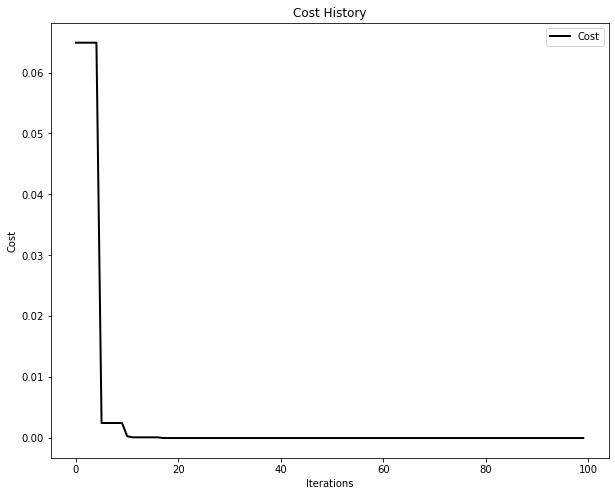

In [3]:
plot_cost_history(cost_history=optimizer.cost_history)

In [5]:
# equivalent to rcParams['animation.html'] = 'html5'
# See http://louistiao.me/posts/notebooks/save-matplotlib-animations-as-gifs/
rc('animation', html='html5')

In [6]:
from pyswarms.utils.plotters.formatters import Mesher

# Initialize mesher with sphere function
m = Mesher(func=fx.sphere)

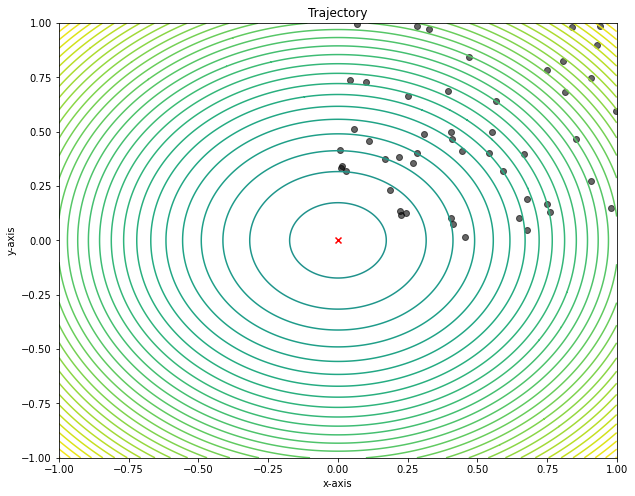

In [11]:
animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m,
                         mark=(0,0))

# Enables us to view it in a Jupyter notebook
#HTML(animation.to_html5_video())

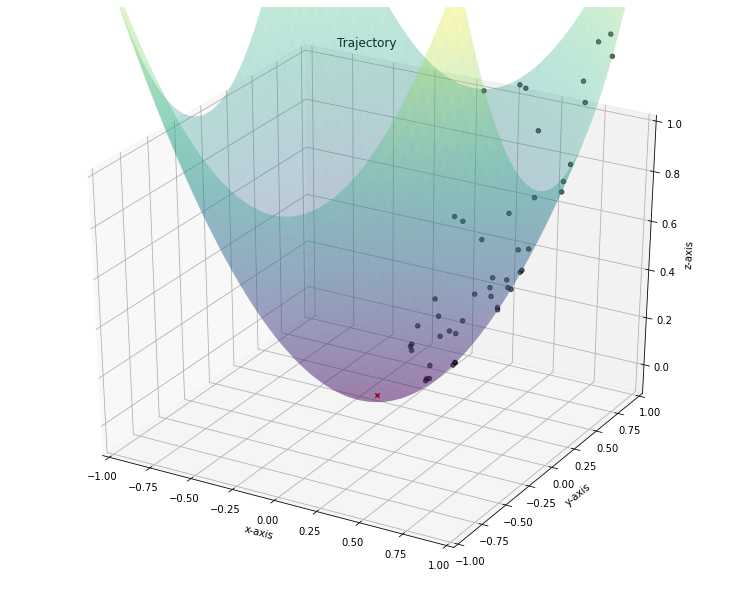

In [12]:
# Obtain a position-fitness matrix using the Mesher.compute_history_3d()
# method. It requires a cost history obtainable from the optimizer class
pos_history_3d = m.compute_history_3d(optimizer.pos_history)

# Make a designer and set the x,y,z limits to (-1,1), (-1,1) and (-0.1,1) respectively
from pyswarms.utils.plotters.formatters import Designer
d = Designer(limits=[(-1,1), (-1,1), (-0.1,1)], label=['x-axis', 'y-axis', 'z-axis'])

# Make animation
animation3d = plot_surface(pos_history=pos_history_3d, # Use the cost_history we computed
                           mesher=m, designer=d,       # Customizations
                           mark=(0,0,0))               # Mark minima

# Enables us to view it in a Jupyter notebook
#HTML(animation3d.to_html5_video())